# Load and visualize data about graduated residents of Toulouse

In [1]:
%load_ext lab_black
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import contextily as cx

#### Data can be downloaded on the French open data portal: https://www.data.gouv.fr/fr/datasets/6235561b6be93e0f0b6723e0/

In [3]:
diplomes_url = "recensement-population-2017-grands-quartiers-diplomes.geojson"

In [4]:
gdf = gpd.read_file(diplomes_url)
gdf_3857 = gdf.to_crs(epsg=3857)  # web mercator
gdf_3857.head()

,p17_nscol15p_sup2,p17_scol1517,p17_nscol15p_bepc,p17_hnscol15p_sup2,p17_pop1114,p17_hnscol15p_bepc,uu2010,lib_grd_quart,code_insee,reg,...,p17_pop0205,dep,p17_nscol15p_sup5,p17_fnscol15p_sup34,p17_nscol15p_capbep,p17_pop1824,p17_nscol15p_diplmin,p17_fnscol15p_diplmin,p17_nscol15p_sup34,geometry
0,350.984866,148.888926,84.535216,146.552912,101.233537,45.896395,31701,Capitole,31555,76,...,112.574404,31,1408.830111,351.080124,198.345766,2510.253001,172.764856,110.212875,702.642089,"POLYGON ((160928.354 5403864.551, 160929.578 5..."
1,354.025973,145.585802,82.327341,139.825121,108.959923,30.973119,31701,Saint-Étienne,31555,76,...,141.348803,31,1440.185001,359.636488,156.585015,850.599953,209.555470,170.135125,610.667983,"POLYGON ((160918.892 5403021.733, 160834.957 5..."
2,468.185741,145.184445,94.293111,214.258792,149.026367,17.135838,31701,Amidonniers,31555,76,...,158.607594,31,1720.068436,403.078360,313.283876,2255.034007,202.933121,103.007055,759.142372,"POLYGON ((157495.817 5405337.475, 157480.678 5..."
3,597.726128,153.753467,206.752496,272.653098,159.928933,95.531791,31701,Saint-Aubin-Dupuy,31555,76,...,215.235951,31,2476.461924,620.303510,551.409940,2328.465175,345.576065,163.100380,996.973608,"POLYGON ((161323.538 5404544.179, 161361.053 5..."
4,616.642316,228.010641,230.411065,258.921071,262.608450,85.938868,31701,Sept Deniers,31555,76,...,312.933125,31,1196.503715,372.768884,762.043959,715.056605,699.001807,415.626273,615.748593,"POLYGON ((157526.096 5405363.151, 157548.249 5..."


In [5]:
gdf_3857["ratio"] = gdf_3857["p17_nscol15p_sup5"] / gdf_3857["p17_nscol15p"] * 100

#### Top 5 districts with highest ratio of graduated residents (BAC+5+)

In [6]:
gdf_3857.sort_values(by=["ratio"], ascending=False).head()  # top 5

,p17_nscol15p_sup2,p17_scol1517,p17_nscol15p_bepc,p17_hnscol15p_sup2,p17_pop1114,p17_hnscol15p_bepc,uu2010,lib_grd_quart,code_insee,reg,...,dep,p17_nscol15p_sup5,p17_fnscol15p_sup34,p17_nscol15p_capbep,p17_pop1824,p17_nscol15p_diplmin,p17_fnscol15p_diplmin,p17_nscol15p_sup34,geometry,ratio
44,377.152524,93.095431,93.186599,123.112937,141.135252,37.027796,31701,Carmes,31555,76,...,31,1759.896890,403.434951,248.141718,1550.307768,238.719886,190.820583,706.315158,"POLYGON ((160365.411 5403689.156, 160362.517 5...",44.538643
1,354.025973,145.585802,82.327341,139.825121,108.959923,30.973119,31701,Saint-Étienne,31555,76,...,31,1440.185001,359.636488,156.585015,850.599953,209.555470,170.135125,610.667983,"POLYGON ((160918.892 5403021.733, 160834.957 5...",43.098016
2,468.185741,145.184445,94.293111,214.258792,149.026367,17.135838,31701,Amidonniers,31555,76,...,31,1720.068436,403.078360,313.283876,2255.034007,202.933121,103.007055,759.142372,"POLYGON ((157495.817 5405337.475, 157480.678 5...",42.644354
43,258.755178,123.009985,97.974009,113.525345,127.961499,23.323795,31701,Saint-Georges,31555,76,...,31,1142.836504,228.710125,195.174317,890.126125,186.993436,96.568342,443.630597,"POLYGON ((161462.131 5403843.952, 161499.534 5...",42.484430
3,597.726128,153.753467,206.752496,272.653098,159.928933,95.531791,31701,Saint-Aubin-Dupuy,31555,76,...,31,2476.461924,620.303510,551.409940,2328.465175,345.576065,163.100380,996.973608,"POLYGON ((161323.538 5404544.179, 161361.053 5...",42.361261


#### Plot city districts based on BAC+5+ ratio (choropleth map)

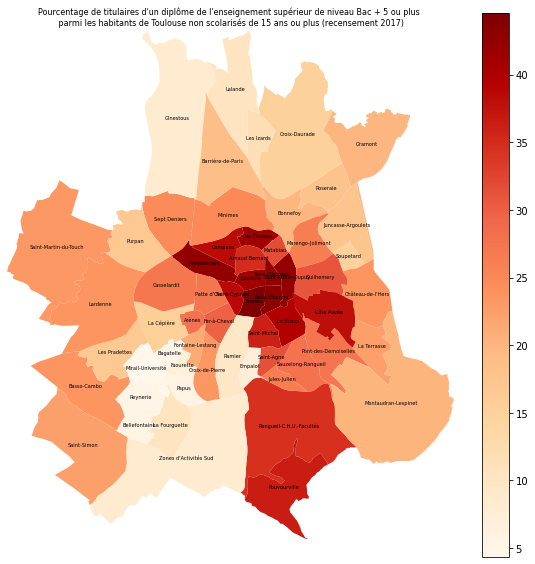

In [7]:
f, ax = plt.subplots(figsize=(10, 10))
gdf_3857.plot(ax=ax, column="ratio", cmap="OrRd", legend=True)
gdf_3857.apply(
    lambda x: ax.annotate(
        text=x["lib_grd_quart"],
        xy=x.geometry.centroid.coords[0],
        ha="center",
        fontsize=5,
        color="black",
    ),
    axis=1,
)
plt.title(
    "Pourcentage de titulaires d'un diplôme de l'enseignement supérieur de niveau Bac + 5 ou plus \n parmi les habitants de Toulouse non scolarisés de 15 ans ou plus (recensement 2017)",
    fontsize=8,
)
ax.set_axis_off()
ax.margins(0)
plt.savefig("bac5.png", dpi=150, bbox_inches="tight")